ejecuta esta celda para que sus funciones estén disponible en el problemset.

In [4]:
from sklearn.datasets import *
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2Ddata_with_boundary(predict,X,y):
    n = 200
    mins,maxs = np.min(X,axis=0), np.max(X,axis=0)
    mins -= np.abs(mins)*.2
    maxs += np.abs(maxs)*.2
    d0 = np.linspace(mins[0], maxs[0],n)
    d1 = np.linspace(mins[1], maxs[1],n)
    gd0,gd1 = np.meshgrid(d0,d1)
    D = np.hstack((gd0.reshape(-1,1), gd1.reshape(-1,1)))
    p = (predict(D)*1.).reshape((n,n))
    plt.contourf(gd0,gd1,p, levels=[-0.1,0.5], alpha=0.5, cmap=plt.cm.Greys)
    plt.scatter(X[y==0][:,0], X[y==0][:,1], c="blue")
    plt.scatter(X[y==1][:,0], X[y==1][:,1], c="red")


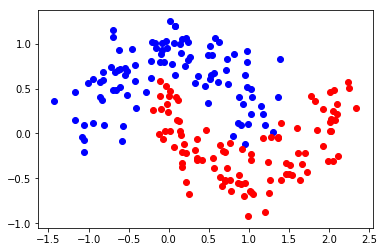

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
n=200
X,y = make_moons(n_samples=n, noise=0.2)
plt.scatter(X[y==0][:,0], X[y==0][:,1], c="blue")
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="red")

## Ejercicio 1: Regresión logística (**CLASIFICACIÓN!!!**)

denotamos un punto cualquiera en $\mathbb{R}^2$ por $\mathbf{x}^{(i)}= [1, x_1^{(i)}, x_2^{(i)}]$ (observa que le hemos añadido un 1), y está asociado a una clase $y^{(i)} \in \{0,1\}$.

**ASUMIMOS** que las clases son linealmente separables por una hiperplano parametrizado por $\theta = [\theta_0, \theta_1, \theta_2]$ a través de la siguiente función:

$$\hat{y}^{(i)} = g(\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)}) = g(\mathbf{x}^{(i)}\theta)\;\;\;\; \hat{y}^{(i)} \in [0,1]$$

con $g(z) = \frac{1}{1+e^{-z}}$, la función sigmoide en donde $0<g(\theta)<1$.  Observa que $g$ es una función escalar: $g: \mathbb{R} \rightarrow \mathbb{R}$

Si $\hat{y}^{(i)}<0.5$ consideramos que la estimación clasifica el dato $x^{(i)}$ en la clase 0, y si no en la clase 1.

queremos encontrar los valores $\theta_{min}$ que parametrizan un hiperplano  de modo que


$$\theta_{min} = \underset{\theta}{arg\,min} \,\,\,\frac{1}{m}\sum_{i=0}^{m-1} (y^{(i)}-g(\theta\mathbf{x}^{(i)}))^2$$

o en modo matricial:

$$\theta_{min} = \underset{\theta}{arg\,min} \,\,\,\textbf{mean} (\mathbf{X}\theta -y)^2$$

en donde $\textbf{mean}$ es la suma de todos los elementos de una matriz o un vector, y $\mathbf{X}$ es la matriz con todos los $\mathbf{x}^{(i)}$ organizados en filas.


**TAREA**: Completa la función de coste dentro del método `fit` para que se realize la minimización anterior

Observa como, primero, añadimos una columna de unos a $X$ para tener un término $\theta_0$ y poder hacer el producto punto de los vectores $\mathbf{x}^{(i)}$ y $\theta$.  **Esto se hace tanto en el método `fit` como en el `predict`**

In [20]:

class LR:

    def fit(self, X, y):
        X = np.hstack((np.ones((len(X),1)), X))

        def cost(t):
            return np.mean( (self.g(X.dot(t))-y)**2)

        r = minimize(cost, np.ones(X.shape[1])*-.11+np.random.random(X.shape[1])*.1, method="BFGS")
        self.theta = r.x  

    def predict(self, X):
        X = np.hstack((np.ones((len(X),1)), X))
        return (self.g(X.dot(self.theta))>0.5)*1

    def g(self, X):
        return 1/(1+np.exp(-X))

    def score(self, X,y):
        return np.sum(self.predict(X)==y)*1./len(X)



se crea una instancia y se ajusta a través de la optimización

In [21]:
lr = LR()
lr.fit(X,y)

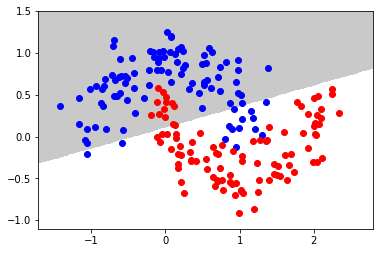

In [22]:
plot_2Ddata_with_boundary(lr.predict, X, y)

#### salida esperada

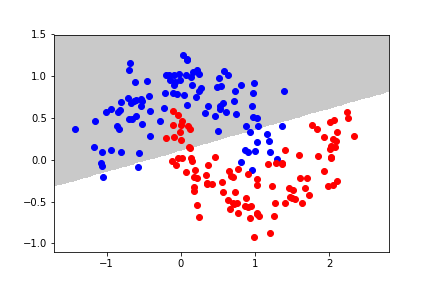

In [17]:
from IPython.display import Image
Image("imgs/lr1.png")

## Ejercicio 2: Características polinomiales

Completa la función `map_features` para expandir X con características polinomiales según la variable de clase `self.pols`, creando un conjunto de columnas nuevo elevando las originales con cada elemento de `self.pols`. Por ejemplo, si `self.pols`
 es `[2,5]`, la expansión de
 
      1  2
      3  2
      2  1
      
sería

      1  2  1  4   1   32
      3  2  9  4  243  32
      2  1  4  1   32   1
      
completa el resto de las funciones de la clase `LR` según el ejercio anterior. 

observa que $\mathbf{X}$ ahora se refiere al dataset con (1) una columna de unos añadida; y (2) la expansión de características polinomiales

In [23]:
class LR:

    def __init__(self, pols):
        self.pols = pols

    def map_features(self, X):
        rX = np.hstack([X**p for p in [1]+self.pols])          
        return rX
        
    def fit(self, X, y):
        X = np.hstack((np.ones((len(X),1)), X))
        X = self.map_features(X)

        def cost(t):
            return np.mean( (self.g(X.dot(t))-y)**2)

        r = minimize(cost, np.ones(X.shape[1])*-.11+np.random.random(X.shape[1])*.1, method="BFGS")
        self.theta = r.x  

    def predict(self, X):
        X = np.hstack((np.ones((len(X),1)), X))
        X = self.map_features(X)
        return (self.g(X.dot(self.theta))>0.5)*1

    def g(self, X):
        return 1/(1+np.exp(-X))

    def score(self, X,y):
        return np.sum(self.predict(X)==y)*1./len(X)



comprueba tu código

In [24]:
import numpy as np
X = np.array([[1, 2], [3,2], [2,1]])
lr = LR(pols=[2,5])
lr.map_features(X)

array([[  1,   2,   1,   4,   1,  32],
       [  3,   2,   9,   4, 243,  32],
       [  2,   1,   4,   1,  32,   1]])

observa las fronteras de clasificación que se generan con distintas transformaciones

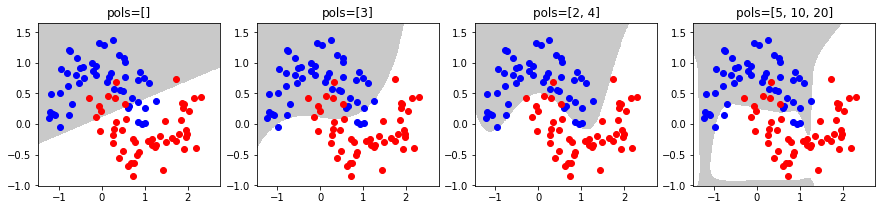

In [45]:
X,y = make_moons(n_samples=100, noise=0.2)

plt.figure(figsize=(15,3))

for i,pols in enumerate([[], [3], [2,4], [5,10,20]]):
    plt.subplot(1,4,i+1)
    lr = LR(pols=pols)
    lr.fit(X,y)
    plot_2Ddata_with_boundary(lr.predict, X,y)
    plt.title("pols="+str(list(pols)))

#### salida esperada (aproximada, según el dataset muestreado)

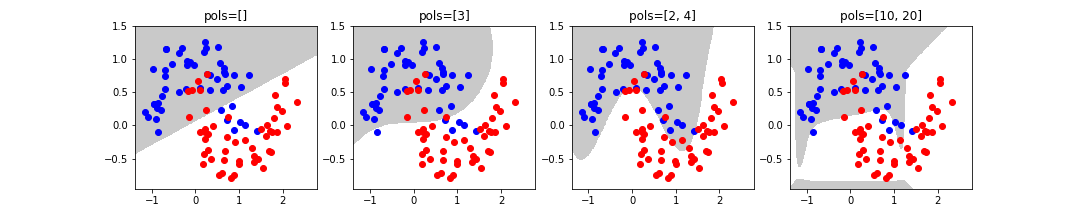

In [40]:
from IPython.display import Image
Image("imgs/lr2.png")

## Ejercicio 2: Regularización

Actualiza la clase implementando la siguiente función de costo

$$\theta_{min} = \underset{\theta}{arg\,min} \,\,\,\frac{1}{m}\sum_{i=0}^{m-1} (y^{(i)}-g(\theta\mathbf{x}^{(i)}))^2 + \lambda||\theta||^2$$

en donde

$$||\theta||^2 = \sum \theta_i^2$$

y `np.linalg.norm(t)` = $||\theta||$


En donde los argumentos `t` y `reg` representan $\theta$ y $\lambda$ respectivamente. 


In [47]:
a = np.r_[1,2,3]
np.linalg.norm(a), np.sqrt(np.sum(a**2))

(3.7416573867739413, 3.7416573867739413)

In [50]:
class LR:

    def __init__(self, pols, reg=0):
        self.pols = pols
        self.reg  = reg

    def map_features(self, X):
        rX = np.hstack([X**p for p in [1]+self.pols])          
        return rX
        
    def fit(self, X, y):
        X = np.hstack((np.ones((len(X),1)), X))
        X = self.map_features(X)

        def cost(t):
            return np.mean( (self.g(X.dot(t))-y)**2) + self.reg*np.linalg.norm(t)**2

        r = minimize(cost, np.ones(X.shape[1])*-.11+np.random.random(X.shape[1])*.1, method="BFGS")
        self.theta = r.x  

    def predict(self, X):
        X = np.hstack((np.ones((len(X),1)), X))
        X = self.map_features(X)
        return (self.g(X.dot(self.theta))>0.5)*1

    def g(self, X):
        return 1/(1+np.exp(-X))

    def score(self, X,y):
        return np.sum(self.predict(X)==y)*1./len(X)


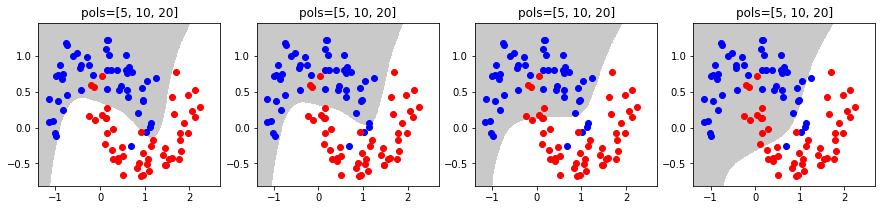

In [69]:
X,y = make_moons(n_samples=100, noise=0.2)

plt.figure(figsize=(15,3))

for i,reg in enumerate([0,.002, .01,.05]):
    plt.subplot(1,4,i+1)
    lr = LR(pols=[4,5,6], reg=reg)
    lr.fit(X,y)
    plot_2Ddata_with_boundary(lr.predict, X,y)
    plt.title("pols="+str(list(pols)))

#### salida esperada (aproximada, según el dataset muestreado)

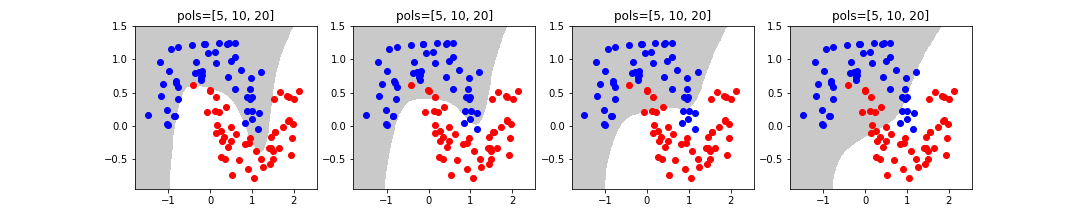

In [66]:
from IPython.display import Image
Image("imgs/lr3.png")